In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [4]:
import pickle

In [13]:
knn_p= pickle.load(open("predictions/knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/o_mf.pkl",'r'))['mf']
tensor_all_p = pickle.load(open("predictions/o_tf_all_appliances.pkl",'r'))['tf_all_appliances']
tensor_all_static_p = pickle.load(open("predictions/o_tf_all_appliances_static_weather.pkl",'r'))['tf_all_appliances_static_weather']

In [7]:
knn= {}
feature='energy_static'
for appliance in knn_p.keys()[:]:
    knn[appliance] = {}
    for feature in ['energy', 'energy_static']:
        print appliance, feature
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac energy
hvac energy_static
wm energy
wm energy_static
fridge energy
fridge energy_static
mw energy
mw energy_static
oven energy
oven energy_static
dw energy
dw energy_static


In [8]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,1.025643,3.767861,23.412383,1.944156,1.140918,0.424438
energy_static,1.044269,3.303662,20.681325,1.876657,1.154699,0.478881


In [9]:
dataset = 'False'
tf_custom= {}
for cost in ['abs','rel']:
    tf_custom[cost]= {}

    for appliance in tensor_custom_p.keys()[:]:
        tf_custom[cost][appliance]= {}
        for case in [str(x) for x in range(1, 5)]:
            print cost, appliance, case
            best_error = 1e6
            for a in [str(x) for x in range(1, 10)]:
                alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_p[appliance][case][a][cost][dataset])
                if error < best_error:
                    best_error = error
                    tf_custom[cost][appliance][case] = best_error

abs hvac 1
abs hvac 2
abs hvac 3
abs hvac 4
abs wm 1
abs wm 2
abs wm 3
abs wm 4
abs fridge 1
abs fridge 2
abs fridge 3
abs fridge 4
abs mw 1
abs mw 2
abs mw 3
abs mw 4
abs oven 1
abs oven 2
abs oven 3
abs oven 4
abs dw 1
abs dw 2
abs dw 3
abs dw 4
rel hvac 1
rel hvac 2
rel hvac 3
rel hvac 4
rel wm 1
rel wm 2
rel wm 3
rel wm 4
rel fridge 1
rel fridge 2
rel fridge 3
rel fridge 4
rel mw 1
rel mw 2
rel mw 3
rel mw 4
rel oven 1
rel oven 2
rel oven 3
rel oven 4
rel dw 1
rel dw 2
rel dw 3
rel dw 4


In [11]:
dataset = 'False'
tf_custom_all= {}
for cost in ['abs']:
    

    for appliance in tensor_custom_p.keys()[:]:
        tf_custom_all[appliance]= {}
        for case in [str(x) for x in range(1, 5)]:
            print cost, appliance, case
            best_error = 1e6
            for a in [str(x) for x in range(1, 11)]:
                try:
                    pred = tensor_all_p[appliance][case][a][cost]
                    if len(pred)<500:
                        print "Skipping", len(pred), a, appliance
                        continue
                    if appliance=='hvac':
                        pred = pred[range(4, 10)]
                    alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
                    if error < best_error:
                        best_error = error
                        tf_custom_all[appliance][case] = best_error
                        print appliance, case, best_error
                except:
                    print a, appliance

abs hvac 1
hvac 1 17.7630641902
hvac 1 14.8485808153
Skipping 2 7 hvac
Skipping 2 8 hvac
Skipping 2 9 hvac
Skipping 2 10 hvac
abs hvac 2
hvac 2 17.7630641838
hvac 2 16.2031137482
hvac 2 14.1539853367
hvac 2 13.8131689854
abs hvac 3
hvac 3 17.7630641917
abs hvac 4
hvac 4 17.763064204
hvac 4 15.6481658613
hvac 4 15.2381104207
hvac 4 14.6986874705
hvac 4 13.7331806451
abs wm 1
wm 1 0.469764911689
wm 1 0.429988047225
wm 1 0.424523438451
Skipping 2 7 wm
Skipping 2 8 wm
Skipping 2 9 wm
Skipping 2 10 wm
abs wm 2
wm 2 0.469764910854
wm 2 0.412623515852
wm 2 0.401448496333
abs wm 3
wm 3 0.46976491212
abs wm 4
wm 4 0.469764910177
wm 4 0.439145783227
wm 4 0.431080988302
abs fridge 1
fridge 1 6.32588772469
fridge 1 6.32542747524
fridge 1 6.10063522493
Skipping 2 7 fridge
Skipping 2 8 fridge
Skipping 2 9 fridge
Skipping 2 10 fridge
abs fridge 2
fridge 2 6.32588772207
fridge 2 5.21931701233
fridge 2 4.9208118518
fridge 2 4.56052921469
fridge 2 4.47031026054
abs fridge 3
fridge 3 6.32588772592
fridge

In [12]:
pd.DataFrame(tf_custom_all)

,dw,fridge,hvac,mw,oven,wm
1,1.077895,6.100635,14.848581,2.034632,1.269625,0.424523
2,0.998765,4.470310,13.813169,1.896880,1.231017,0.401448
3,1.168700,5.665838,17.763064,1.967470,1.410991,0.469765
4,1.068626,5.311574,13.733181,1.948117,1.242377,0.431081


In [13]:
pd.DataFrame(tf_custom['abs'])

,dw,fridge,hvac,mw,oven,wm
1,0.983833,3.549308,25.885237,1.858268,1.180908,0.396592
2,1.143432,3.957940,25.791674,2.050480,1.410305,0.430687
3,1.151561,3.919696,25.208624,1.927213,1.204024,0.422099
4,0.998215,3.511995,23.428323,1.849683,1.223426,0.426134


In [11]:
tensor_custom_static_weather_p['hvac']['True']['1']['static']['weather'].keys()

['abs', 'rel']

In [12]:
dataset = 'False'
tf_custom_static_weather= {}
for cost in ['abs']:
    tf_custom_static_weather[cost]= {}

    for appliance in tensor_custom_static_weather_p.keys()[:]:
        tf_custom_static_weather[cost][appliance]= {}
        for static in ['None','static']:
            tf_custom_static_weather[cost][appliance][static] = {}
            for weather in ['None','weather']:
                tf_custom_static_weather[cost][appliance][static][weather] = {}
                print cost, appliance, static, weather
                best_error = 1e6
                for a in [str(x) for x in range(1, 10)]:
                    alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost])
                    if error < best_error:
                        best_error = error
                        tf_custom_static_weather[cost][appliance][static][weather] = best_error

abs hvac None None
abs hvac None weather
abs hvac static None
abs hvac static weather
abs wm None None
abs wm None weather
abs wm static None
abs wm static weather
abs fridge None None
abs fridge None weather
abs fridge static None
abs fridge static weather
abs mw None None
abs mw None weather
abs mw static None
abs mw static weather
abs oven None None
abs oven None weather
abs oven static None
abs oven static weather
abs dw None None
abs dw None weather
abs dw static None
abs dw static weather


In [18]:
tensor_all_static_p[appliance]['None']['None']['1']

,0,1,2,3,4,5,6,7,8,9,10,11
22,62.471572,55.410340,53.118615,60.043944,76.834781,103.934606,118.272531,132.008926,101.780324,80.768915,55.400818,61.628684
26,197.588454,175.254437,167.991462,189.888594,242.967288,328.637098,373.999834,417.375269,321.821205,255.392346,175.211228,194.909929
48,58.691529,52.056575,49.903084,56.408513,72.182938,97.642628,111.112891,124.018012,95.618191,75.878427,52.046702,57.897362
59,234.633061,208.144223,199.590840,225.661594,288.770739,390.580936,444.462513,496.045927,382.478428,303.541258,208.150987,231.550730
68,52.930429,46.947409,45.004707,50.872372,65.098701,88.060167,100.208452,111.847141,86.234462,68.431538,46.938469,52.214920
77,217.675538,193.071930,185.082253,209.208687,267.708721,362.149487,412.055808,459.912028,354.623811,281.433538,193.017770,214.714164
86,281.097314,249.320188,238.996246,270.118557,345.639290,467.490374,531.946084,593.724745,457.801805,363.326681,249.252931,277.272143
93,164.737513,146.116788,140.067702,158.319141,202.578579,274.001976,311.784316,347.991143,268.325672,212.946290,146.083555,162.504281
94,71.018836,62.991127,60.384576,68.257343,87.345093,118.152696,134.452061,150.067939,115.703156,91.816686,62.978916,70.058368
101,117.991881,104.654944,100.324258,113.403545,145.115636,196.295852,223.371318,249.314024,192.229487,152.548949,104.644663,116.408000


In [20]:
dataset = 'False'
tf_all_static_weather= {}
for cost in ['abs']:
    tf_all_static_weather[cost]= {}

    for appliance in tensor_custom_static_weather_p.keys()[:]:
        tf_all_static_weather[appliance]= {}
        for static in ['None','static']:
            tf_all_static_weather[appliance][static] = {}
            for weather in ['None','weather']:
                tf_all_static_weather[appliance][static][weather] = {}
                print cost, appliance, static, weather
                
                best_error = 1e6
                for a in [str(x) for x in range(1, 13)]:
                    pred = tensor_all_static_p[appliance][static][weather][a]
                    if len(pred)<500:
                        print "Skipping", len(pred), a, appliance
                        continue
                    if appliance=='hvac':
                        pred = pred[range(4, 10)]
                    alpha, beta, error, e = compute_rmse_fraction(appliance,pred)
                    if error < best_error:
                        best_error = error
                        tf_all_static_weather[appliance][static][weather] = best_error

abs hvac None None
abs hvac None weather
abs hvac static None
abs hvac static weather
abs wm None None
abs wm None weather
abs wm static None
abs wm static weather
abs fridge None None
abs fridge None weather
abs fridge static None
abs fridge static weather
abs mw None None
abs mw None weather
abs mw static None
abs mw static weather
abs oven None None
abs oven None weather
abs oven static None
abs oven static weather
abs dw None None
abs dw None weather
abs dw static None
abs dw static weather


In [26]:
tensor_all_static_p['hvac']['None']['None']['1'].head()

,0,1,2,3,4,5,6,7,8,9,10,11
22,62.471572,55.410340,53.118615,60.043944,76.834781,103.934606,118.272531,132.008926,101.780324,80.768915,55.400818,61.628684
26,197.588454,175.254437,167.991462,189.888594,242.967288,328.637098,373.999834,417.375269,321.821205,255.392346,175.211228,194.909929
48,58.691529,52.056575,49.903084,56.408513,72.182938,97.642628,111.112891,124.018012,95.618191,75.878427,52.046702,57.897362
59,234.633061,208.144223,199.590840,225.661594,288.770739,390.580936,444.462513,496.045927,382.478428,303.541258,208.150987,231.550730
68,52.930429,46.947409,45.004707,50.872372,65.098701,88.060167,100.208452,111.847141,86.234462,68.431538,46.938469,52.214920


In [31]:
tensor_all_p['hvac']['2']['1']['abs'].head()

,0,1,2,3,4,5,6,7,8,9,10,11
22,62.471578,55.410331,53.118615,60.043944,76.834781,103.934606,118.272532,132.008926,101.780324,80.768915,55.400818,61.628695
26,197.588445,175.254473,167.991462,189.888595,242.967288,328.637098,373.999833,417.375267,321.821204,255.392346,175.211227,194.909985
48,58.691536,52.056579,49.903085,56.408515,72.182939,97.642629,111.112892,124.018012,95.618192,75.878427,52.046702,57.897374
59,234.633051,208.144215,199.590838,225.661595,288.770736,390.580931,444.462507,496.045922,382.478424,303.541254,208.150984,231.550685
68,52.930425,46.947419,45.004707,50.872372,65.098702,88.060167,100.208452,111.847141,86.234462,68.431538,46.938469,52.214917


In [25]:
pd.DataFrame(tf_all_static_weather['oven'])

,None,static
None,1.217604,1.227983
weather,1.217766,1.219275


In [43]:
out = {}
for static in ['None','static']:
    for weather in ['None','weather']:
        out[(static, weather)] =  {}
        for lat in range(1, 13):
            out[(static, weather)][lat] =  compute_rmse_fraction('hvac',tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)])[2]

In [36]:
%matplotlib inline

In [44]:
pd.DataFrame(out)

None                static           
         None    weather       None    weather
1   17.763064  37.881677  20.216549  39.374896
2   16.114174  17.713309  19.422382  19.669312
3   15.832954  15.060197  18.568273  19.007349
4   14.774786  15.375924  14.332971  14.289717
5   14.782449  13.875408  14.215059  14.343986
6   14.940674  14.078421  15.021345  15.692301
7   15.402832  14.559506  15.159855  15.812302
8   14.666721  17.093780  14.764359  13.967241
9   15.386368  14.752423  14.852627  14.502615
10  15.207147  15.529659  14.910066  13.923290
11  15.029201  13.839986  13.926203  13.590876
12  14.821738  14.213949  15.333223  13.688907

In [53]:
o = {}
l = {}
for a in [str(x) for x in range(1, 10)]:
    pred = tensor_all_p['hvac']['2'][a]['abs'][range(4, 10)]
    l[a] = pred.notnull().sum().sum()
    o[a] = compute_rmse_fraction('hvac',pred)[2]

In [50]:
pd.Series(o)

1    17.763064
2    16.203114
3    14.153985
4    15.141842
5    13.813169
6    14.950377
7    14.447301
8    14.623346
9    14.476985
dtype: float64

In [54]:
pd.Series(l)

1    3234
2    3234
3    3234
4    3234
5    3234
6    3234
7    3234
8    3234
9    3234
dtype: int64

In [55]:
out = {}
la = {}
for static in ['None']:
    for weather in ['None']:
        out[(static, weather)] =  {}
        for lat in range(1, 13):
            pred = tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)]
            la[lat] = pred.notnull().sum().sum()
            out[(static, weather)][lat] =  compute_rmse_fraction('hvac',pred)[2]

In [67]:
pd.DataFrame(out)

,None
,None
1,17.763064
2,16.114174
3,15.832954
4,14.774786
5,14.782449
6,14.940674
7,15.402832
8,14.666721
9,15.386368


In [68]:
pd.Series(o)

1    17.763064
2    16.203114
3    14.153985
4    15.141842
5    13.813169
6    14.950377
7    14.447301
8    14.623346
9    14.476985
dtype: float64

In [66]:
tensor_all_static_p['hvac'][static][weather][str(lat)][range(4, 10)].notnull().sum().sum()

3234

In [64]:
tensor_all_p['hvac']['2'][a]['abs'][range(4, 10)].notnull().sum().sum()

3234

In [80]:
a = tensor_all_static_p['hvac'][static][weather]['2'][range(4, 10)]
b = tensor_all_p['hvac']['2']['2']['abs'][range(4, 10)]

In [82]:
a-b

,4,5,6,7,8,9
22,0.330508,1.576779,2.165238,2.980595,1.541805,0.701235
26,-5.447201,-4.751741,-6.964432,-11.299740,-5.218508,-5.107230
48,-3.621563,-12.044785,-15.401675,-19.467817,-11.581545,-5.986540
59,-1.893211,0.633450,1.801489,3.563375,0.619285,-0.967873
68,1.887397,3.164649,3.823011,4.584504,3.103491,2.166971
77,5.478787,-5.327527,-9.990457,-17.199175,-5.083662,1.778371
86,-1.601687,-0.411715,-0.594268,-0.737805,-0.499811,-1.369696
93,0.773855,3.919209,4.797078,5.909102,3.765266,1.533481
94,0.427711,-0.230971,-0.309439,-2.084323,-0.303587,0.218471
101,1.389618,3.237741,4.179745,5.495836,3.170622,1.847626


In [81]:
(a-b).max().max()

313.15755650599993

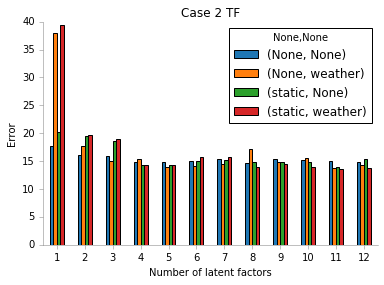

In [47]:
from plot_functions import *
pd.DataFrame(out).plot(kind="bar", rot=0,colors=tableau20blind[::2])
plt.title("Case 2 TF")
format_axes(plt.gca())
plt.ylabel("Error")
plt.xlabel("Number of latent factors")

#### MF

In [113]:
mf_p['hvac']['energy_static']['absolute']['False']['3'].describe()

,hvac_5,hvac_6,hvac_7,hvac_8,hvac_9,hvac_10
count,539.000,539.000,539.000,539.000,539.000,539.000
mean,151.185,345.530,433.333,524.310,332.736,192.859
std,113.662,241.057,303.084,364.626,224.559,132.385
min,16.911,33.528,42.338,50.578,30.115,18.094
25%,62.779,145.463,182.177,221.243,144.966,82.210
50%,134.691,313.335,392.309,476.275,304.265,176.273
75%,202.643,460.890,579.060,698.353,444.922,257.013
max,1170.544,2491.783,3138.656,3785.721,2308.523,1355.038


In [119]:
tensor_custom_p['hvac']['2']['3']['abs']["False"].describe()

,0,1,2,3,4,5
count,539.000,539.000,539.000,539.000,539.000,539.000
mean,189.065,364.374,448.856,534.596,350.741,223.411
std,73.696,122.803,152.166,181.214,117.587,81.397
min,41.533,72.885,87.651,106.793,77.674,44.027
25%,136.160,267.977,324.287,385.136,257.572,163.349
50%,183.607,360.548,451.970,536.431,352.270,221.496
75%,235.949,452.220,551.039,664.591,438.912,278.051
max,449.899,648.557,907.331,1012.451,694.191,500.709


In [14]:
mf_results = {}
dataset = 'False'
for appliance in mf_p:
    mf_results[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}
            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    print lat, cost, feature, appliance
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    gt_f, pred_f, rms,e  = compute_rmse_fraction(appliance, pred)
                    if rms < least_error:
                        least_error = rms
                        best_k = lat
                        print best_k, least_error
                except:
                    pass
            mf_results[appliance][feature][cost] = least_error

1 absolute energy_static hvac
2 absolute energy_static hvac
3 absolute energy_static hvac
3 17.2428962453
4 absolute energy_static hvac
4 14.3021075028
5 absolute energy_static hvac
6 absolute energy_static hvac
7 absolute energy_static hvac
8 absolute energy_static hvac
8 13.0166182945
9 absolute energy_static hvac
1 absolute energy hvac
1 12.7640933676
2 absolute energy hvac
3 absolute energy hvac
4 absolute energy hvac
5 absolute energy hvac
6 absolute energy hvac
7 absolute energy hvac
8 absolute energy hvac
9 absolute energy hvac
9 11.712453226
1 absolute energy_static wm
2 absolute energy_static wm
3 absolute energy_static wm
3 0.433884866727
4 absolute energy_static wm
4 0.415647932101
5 absolute energy_static wm
6 absolute energy_static wm
7 absolute energy_static wm
8 absolute energy_static wm
9 absolute energy_static wm
1 absolute energy wm
1 0.412417939015
2 absolute energy wm
3 absolute energy wm
4 absolute energy wm
5 absolute energy wm
6 absolute energy wm
7 absolute ener

In [16]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [17]:
pd.DataFrame(mf_relative)

""


In [18]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,1.048077,4.839685,11.712453,1.934062,1.116397,0.412418
energy_static,0.816300,4.140797,13.016618,1.930631,1.211684,0.415648


In [19]:
(pd.DataFrame(tf_custom_static_weather['abs']).ix['static']).ix['dw']['weather']

NameError: name 'tf_custom_static_weather' is not defined

In [20]:
pd.DataFrame(tf_custom['abs']).index

Index([u'1', u'2', u'3', u'4'], dtype='object')

In [21]:
 pd.DataFrame(tf_custom['abs']).ix['1']

dw         0.983833
fridge     3.549308
hvac      25.885237
mw         1.858268
oven       1.180908
wm         0.396592
Name: 1, dtype: float64

In [27]:
results_df ={}
results_df[('MF (Abs)','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF (Abs)','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in range(1, 5):
    results_df[('TF-1-at-a-time-'+str(case)+" (Abs)",'Energy')] = pd.DataFrame(tf_custom['abs']).ix[str(case)]
    results_df[('TF-all-appliances-'+str(case)+" (Abs)",'Energy')] = pd.DataFrame(tf_custom_all).ix[str(case)]
    
#for case in range(1, 5):
#    results_df[('TF-Custom-'+str(case)+" (Rel)",'Energy')] = pd.DataFrame(tf_custom_rel).ix[case]

#results_df[('TF-Custom-'+str(4)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_parafac_static)
#results_df[('TF-Custom-'+str(4)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_parafac_static_rel)

#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series(tf_custom_static_weather)
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series(tf_custom_static_abs)
#results_df[('TF-Custom-'+str(2)+" (Rel)",'Energy+Static')] = pd.Series(tf_custom_2_static_rel)


#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['None'] for appliance in mf_p})
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['None']['weather'] for appliance in mf_p})
#results_df[('TF-Custom-'+str(2)+" (Abs)",'Energy+Static+Weather')] = pd.Series({appliance:tf_custom_static_weather['abs'][appliance]['static']['weather'] for appliance in mf_p})







In [28]:
tf_custom_static_weather['abs']['dw']['None']['None']

NameError: name 'tf_custom_static_weather' is not defined

In [29]:
pd.DataFrame(results_df)

KNN               MF (Abs)               TF-1-at-a-time-1 (Abs)  \
        Energy Energy+Static   Energy Energy+Static                 Energy   
dw       1.026         1.044    1.048         0.816                  0.984   
fridge   3.768         3.304    4.840         4.141                  3.549   
hvac    23.412        20.681   11.712        13.017                 25.885   
mw       1.944         1.877    1.934         1.931                  1.858   
oven     1.141         1.155    1.116         1.212                  1.181   
wm       0.424         0.479    0.412         0.416                  0.397   

       TF-1-at-a-time-2 (Abs) TF-1-at-a-time-3 (Abs) TF-1-at-a-time-4 (Abs)  \
                       Energy                 Energy                 Energy   
dw                      1.143                  1.152                  0.998   
fridge                  3.958                  3.920                  3.512   
hvac                   25.792                 25.209                 23.428   
mw                      2.050                  1.927                  1.850   
oven                    1.410                  1.204                  1.223   
wm                      0.431                  0.422                  0.426   

       TF-all-appliances-1 (Abs) TF-all-appliances-2 (Abs)  \
                          Energy                    Energy   
dw                         1.078                     0.999   
fridge                     6.101                     4.470   
hvac                      14.849                    13.813   
mw                         2.035                     1.897   
oven                       1.270                     1.231   
wm                         0.425                     0.401   

       TF-all-appliances-3 (Abs) TF-all-appliances-4 (Abs)  
                          Energy                    Energy  
dw                         1.169                     1.069  
fridge                     5.666                     5.312  
hvac                      17.763                    13.733  
mw                         1.967                     1.948  
oven                       1.411                     1.242  
wm                         0.470                     0.431

In [30]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [31]:
pd.set_option('precision', 3)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})


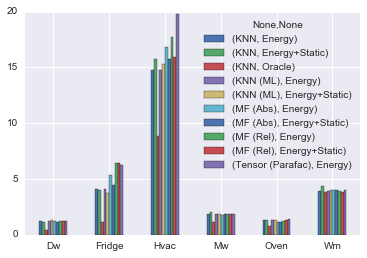

In [24]:
%matplotlib inline
out.T.plot(kind="bar",rot=0)

In [27]:
appliance='hvac'
pred = knn_p[appliance][feature][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

In [42]:
print neighbours
pred = mf_p[appliance][feature]['relative'][neighbours]
gt_f, pred_f, rms, e = compute_rmse_fraction(appliance, pred)

4


In [55]:
e[e>50]

hvac_6  2378     66.320
hvac_7  9931     55.425
hvac_8  1283     50.375
        4297     53.084
        5109    111.909
        7016     76.824
        9931     57.367
hvac_9  9931     54.087
dtype: float64

In [30]:
pred.ix[7641]

5     181.223
6     501.261
7     667.553
8     816.993
9     486.119
10    298.398
Name: 7641, dtype: float64

In [32]:
gt_f.ix[7641]

hvac_5     40.110
hvac_6     48.855
hvac_7     52.535
hvac_8     55.951
hvac_9     40.766
hvac_10    29.589
Name: 7641, dtype: float64

In [54]:
pred_f[pred_f>60].unstack().dropna()

hvac_6  2378    66.686
hvac_8  936     70.419
        1169    80.873
        3482    70.894
        4922    63.049
        5109    76.167
        7016    77.230
        9134    67.873
dtype: float64

In [36]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut
from scipy.optimize import nnls

import pickle
from tensor_custom_core import *


APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "Austin"
year = 2014

def un_normalize(x, maximum, minimum):
    return (maximum-minimum)*x + minimum


a, b = 3, 3

print a, b


pred = {}
for appliance in APPLIANCES[:1]:
    pred[appliance] = {}
    if appliance == "hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    months = stop - start
    pred[appliance] = {}
    appliance_df = create_matrix_all_entries(region, year, appliance)
    aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    energy_cols = np.concatenate([aggregate_cols, appliance_cols])

    df = appliance_df.copy()

3 3


In [42]:
df.columns[-3:]

Index([u'area', u'total_occupants', u'num_rooms'], dtype='object')

In [43]:
static_cols = ['area', 'total_occupants', 'num_rooms']
static_df = df[static_cols]
static_df = static_df.div(static_df.max())

In [44]:
static_df

,area,total_occupants,num_rooms
26,0.585,0.8,0.400
222,0.629,1.0,0.267
410,0.371,0.4,0.533
545,0.699,0.4,0.800
624,0.600,0.8,0.467
661,0.475,0.4,0.400
871,0.472,0.8,0.533
936,0.400,0.8,0.533
1169,0.409,0.4,0.400
1334,0.314,0.4,0.333


In [60]:
weather_df = np.ones(len(static_df)).reshape(-1, 1)

In [61]:
weather_df

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])